In [9]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# I have shaped the dataset with channel_last
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


### Plotting first 5 images in the grayscale

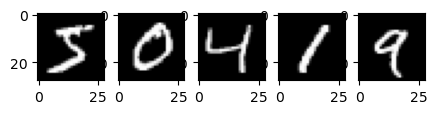

In [27]:
plt.figure(figsize=(5, 2))
# Figure size : 5 units in width and 2 units in the height
for i in range(5):  
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    #plt.axis('off')

plt.show()

# Now the data is Preprocessed. I will now define the CNN model

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
#second convolution layer
model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))


In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

### Now, to train the model, i decided to split the training set into validation set by the fraction of 0.1

In [13]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8718 - loss: 0.4313 - val_accuracy: 0.9825 - val_loss: 0.0679
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9821 - loss: 0.0575 - val_accuracy: 0.9887 - val_loss: 0.0457
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9903 - loss: 0.0323 - val_accuracy: 0.9910 - val_loss: 0.0364
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9930 - loss: 0.0216 - val_accuracy: 0.9883 - val_loss: 0.0416
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9915 - val_loss: 0.0380
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9962 - loss: 0.0119 - val_accuracy: 0.9912 - val_loss: 0.0362
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9895 - val_loss: 0.0479
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 

### Next, I was instructed to plot the graphs of the training and validation. 

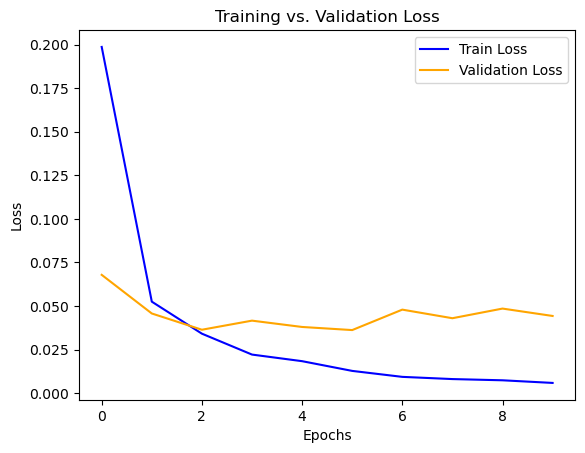

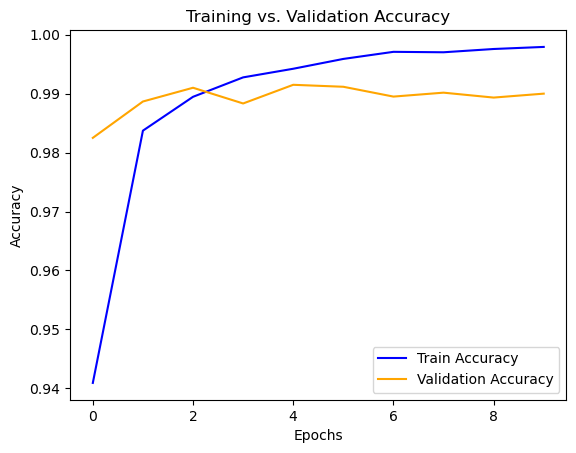

In [16]:
#training loss vs validation loss

plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

# Training accuracy vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()


In [14]:
test_loss,test_accuracy = model.evaluate(test_images, test_labels)
print(f"test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9839 - loss: 0.0576
test accuracy: 0.9885


#### First try - 20 epochs -> Accuracy came out  to be 99.17 percent. It was probably overfitting. 
#### Second try - 10 epochs -> Accuracy came out to be 98.12 percent. It is acceptable

In [15]:
# To make predictions

prediction = model.predict(test_images)
predicted_labels = np.argmax(prediction,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
